In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('sportsref_download.csv')
df.head()
df.drop(columns=['MP'], inplace=True)

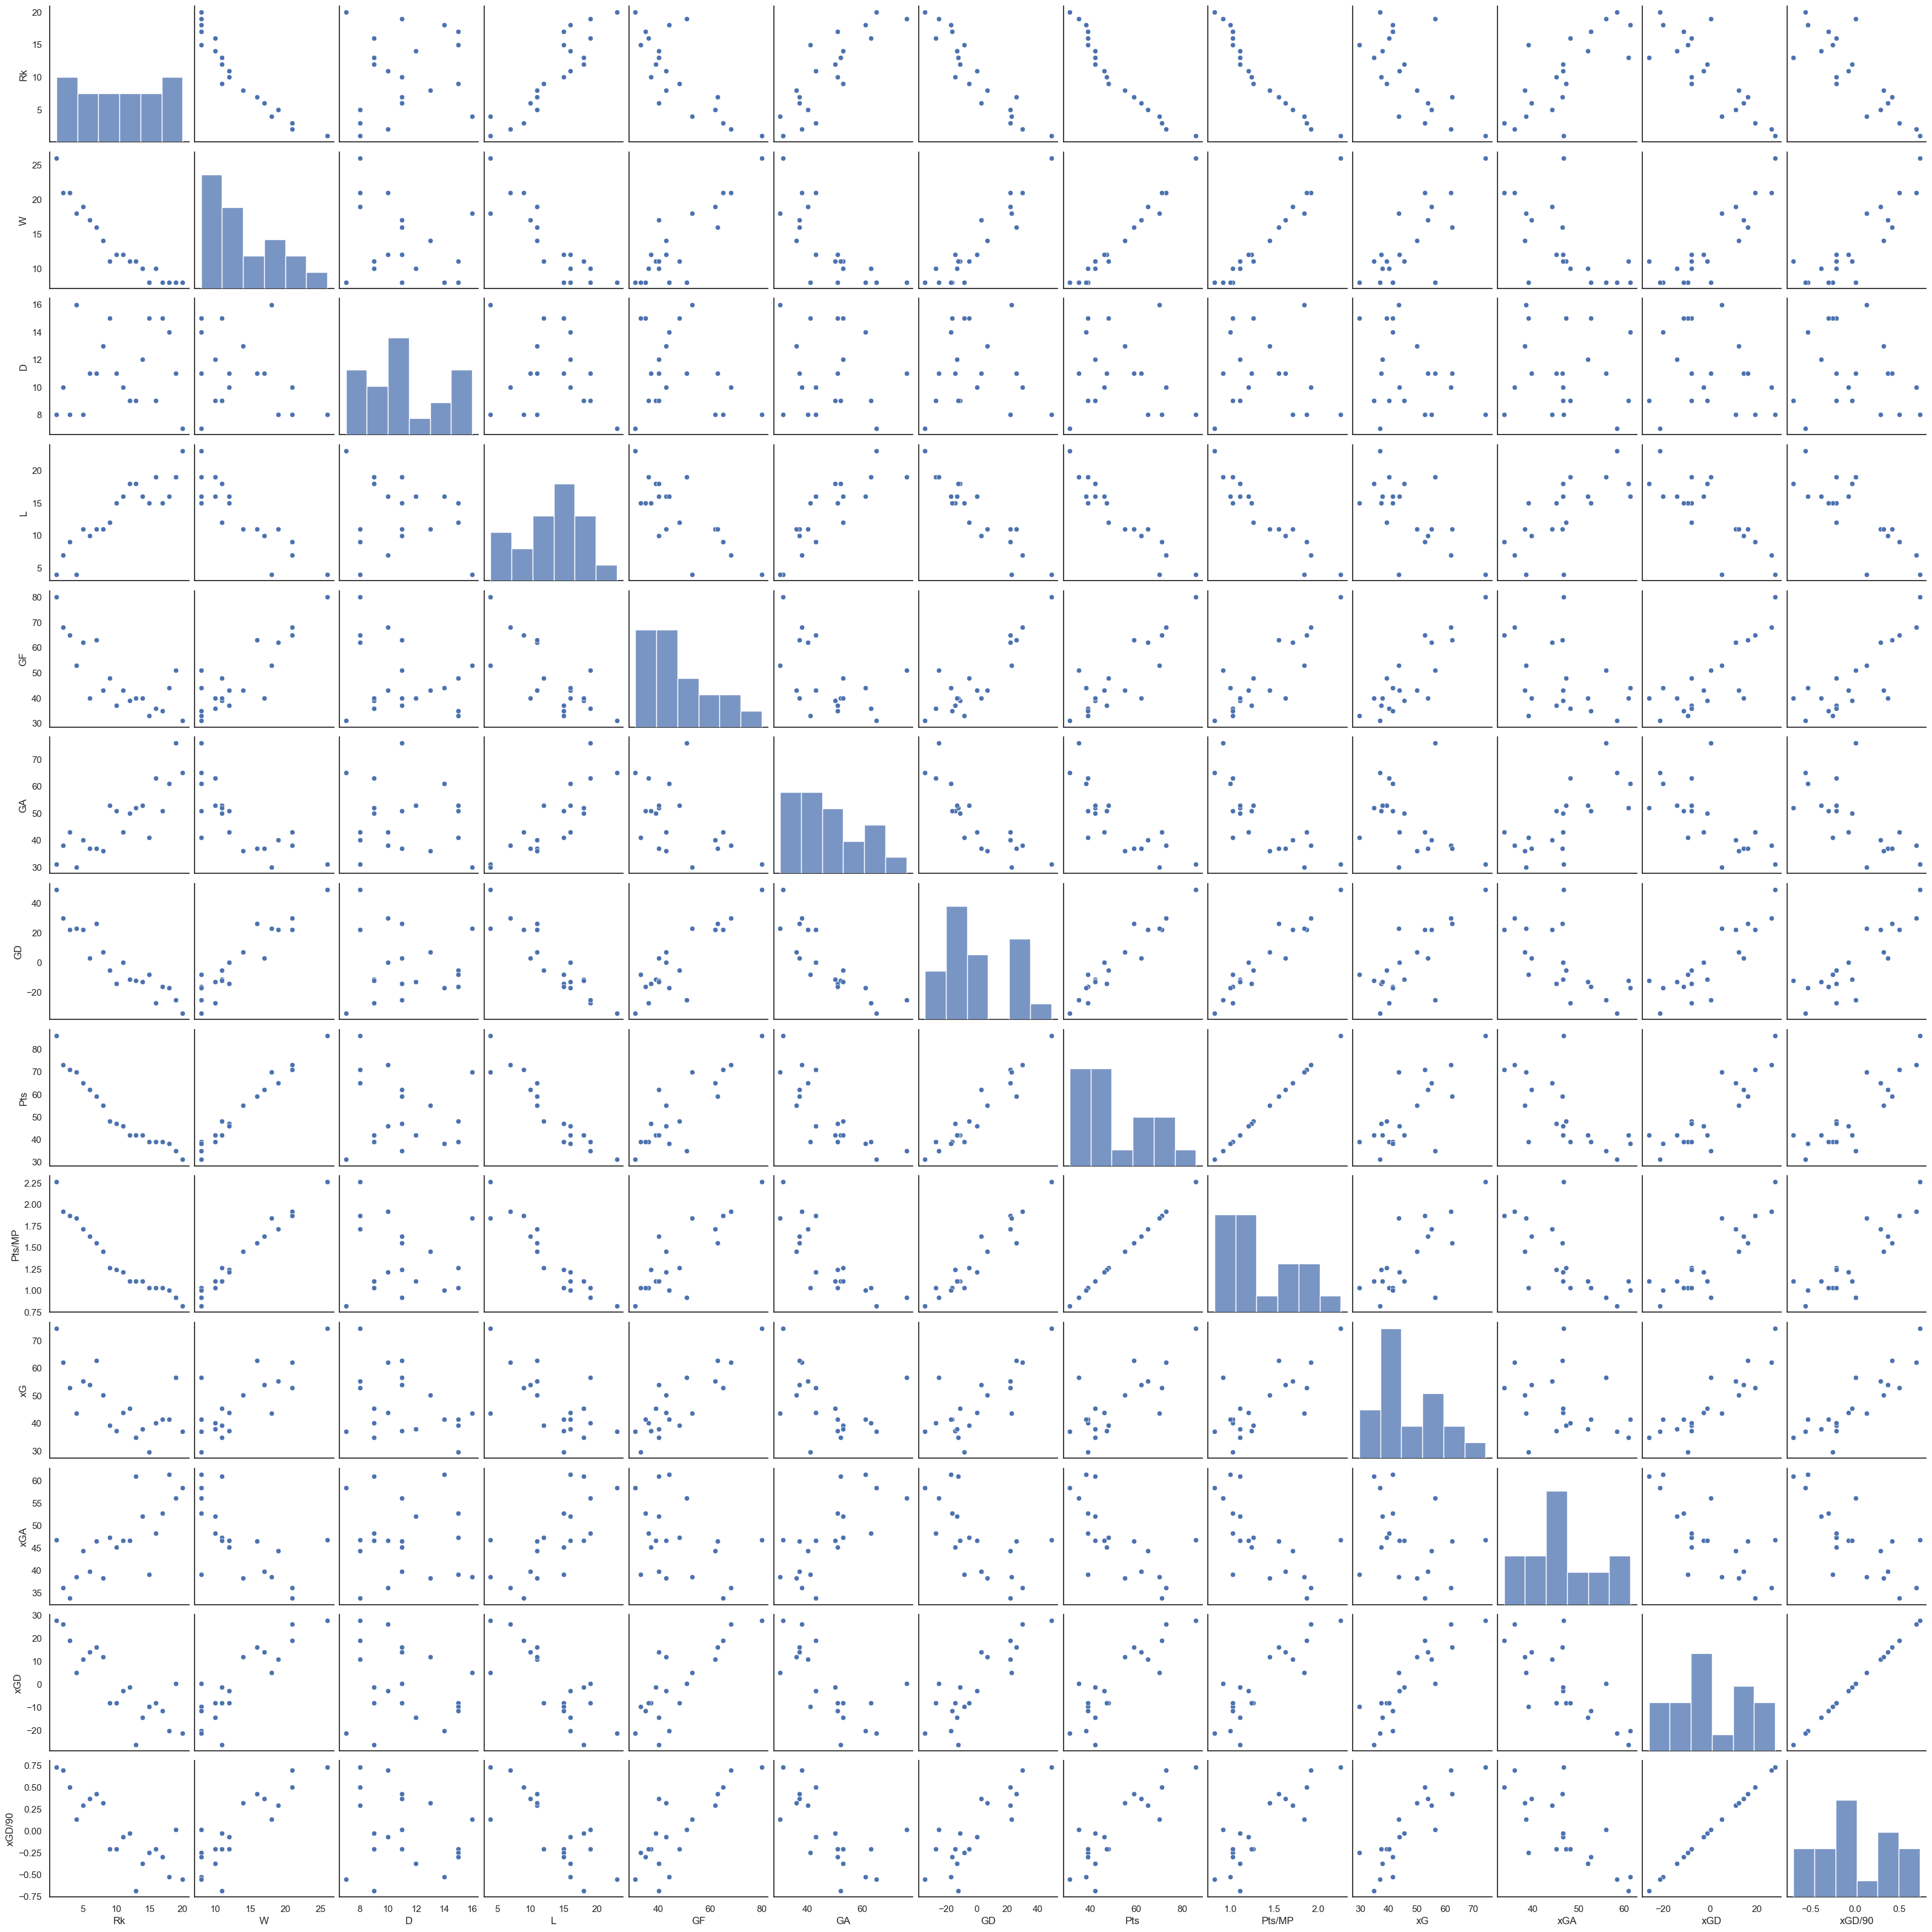

In [103]:


sns.set(style="white", color_codes=True)
g = sns.pairplot(df)
import matplotlib.pyplot as plt
plt.show(g)

#describe dataframe


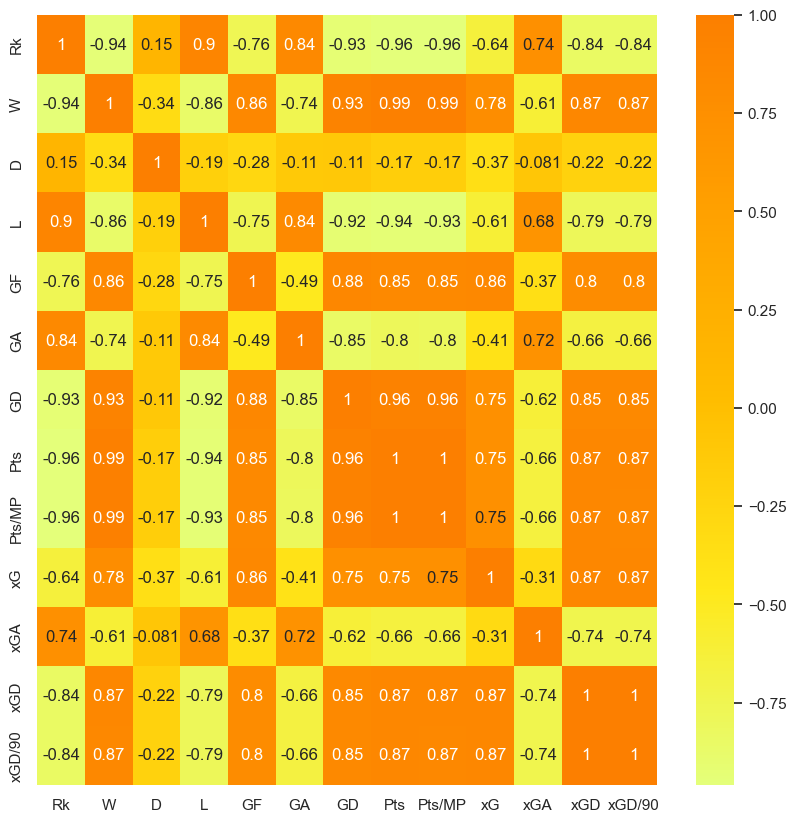

In [104]:

#df = df.select_dtypes(exclude=['object'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Wistia', annot= True)
plt.show()


In [105]:
df= df[['Rk', 'xGD/90', 'xG', 'xGA', 'xGD', 'GA', 'GF']]
df.head()

,Rk,xGD/90,xG,xGA,xGD,GA,GF
0,1,0.73,74.4,46.8,27.6,31,80
1,2,0.69,62.1,36.0,26.1,38,68
2,3,0.50,52.8,33.7,19.1,43,65
3,4,0.13,43.5,38.5,5.0,30,53
4,5,0.29,55.2,44.3,10.9,40,62


In [106]:
df.reset_index(drop=True, inplace=True)
y=df['Rk']
df.drop(columns=['Rk'], inplace=True)
x= df


/var/folders/7q/mglj5d210slgtwrf2qvlv9300000gn/T/ipykernel_30690/2446110776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Rk'], inplace=True)


In [116]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=.2)
# View the shape of your data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16, 6), (4, 6), (16,), (4,))

In [117]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [118]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred= linear_model.predict(X_test)
mse = mean_squared_error( y_test, y_pred )   # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print( linear_model.score(X_test, y_test) )

Test mean squared error (MSE): 4.98
0.5547478730804636


In [119]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

poly_reg_model.score(poly_features, y_train)

poly_featuresTest = poly.fit_transform(X_test)
poly_reg_model.score(poly_featuresTest, y_test)


0.41805623268864034